In [1]:
# Import packages

from IPython.display import display
from IPython.display import HTML
from pypharma_nlp.pubmed import get_publication_sentences
from pypharma_nlp.pubmed import get_publications
from pypharma_nlp.pubmed import get_publications_table
from pypharma_nlp.pubmed import get_search_results
from pypharma_nlp.bert import get_tokens
from pypharma_nlp.bert import get_token_probabilities
from pypharma_nlp.bert import plot_token_probabilities
import pandas as pd

In [2]:
# Get abstracts having the text 'T790M'
#
# Note: T790M is a mutation in exon 20 of the EGFR gene that 
# confers resistance to treatment with Tyrosine Kinase 
# Inhibitors

records = get_publications("T790M[AB]", max_results=10)
abstracts_table = get_publications_table(records)
display(HTML(abstracts_table.to_html(index=False)))

PMID,TI,AU,AB
31442277,Effectiveness and safety of osimertinib in patients with metastatic EGFR T790M-positive NSCLC: An observational real-world study.,Cao Y; Qiu X; Xiao G; Hu H; Lin T,"Osimertinib showed encouraging efficacy in patients with advanced EGFR T790M-positive NSCLC in previous randomized controlled trials. This real-world study aimed to evaluate the effectiveness and safety of osimertinib in a real-world setting. This observational study (NCT03133234) included 74 patients with metastatic EGFR T790M-positive NSCLC who progressed on prior EGFR TKI therapy and received osimertinib between May 2016 and April 2018 at the Kiang Wu Hospital in Macau. Response rate (RR) and other endpoints (progression-free survival [PFS], overall survival [OS], disease control rate [DCR], stable disease rate, and adverse events) were assessed. Survival data were estimated using the Kaplan-Meier method. All patients had stage IV lung adenocarcinoma and 25.6% had brain metastases; median age was 58 years (range 28-84 years) and 83.8% of patients had received at least three prior lines of treatment. The median duration of osimertinib treatment was 8 months (range, 1-25 months). RR and DCR were 67.5% (95% CI 56.9-78.1) and 79.8% (95% CI 70.7-88.9), respectively, while 12.1% had stable disease. The median PFS was 9.0 months (95% CI 6.7-11.2 months), and the median OS was 12.0 months (95% CI 8.8-15.1 months). Nausea (25.8%) and decreased appetite (20.2%) were the most common adverse events associated with osimertinib treatment. Even though most patients had at least three lines of prior treatment, real-world RR and PFS with osimertinib in this study were consistent with those from randomized controlled trials; no new safety signals were observed."
31433117,Real-world outcomes of NSCLC patients receiving tissue or circulating tumor DNA-guided osimertinib treatment.,Su PL; Yang SC; Chen YL; Wu YL; Lin CY; Chang WY; Tseng YL; Lai WW; Ho CL; Lin CC; Su WC,"BACKGROUND: Osimertinib yields significant tumor responses and durations of progression-free survival (PFS) in patients with acquired T790M mutations. However, the evidence supporting liquid biopsy-guided treatment is still limited. This study examined the real-world benefits of osimertinib in patients with tissue or plasma T790M mutations. METHODS: From January 2016 to June 2018, a total of 183 non-small-cell lung cancer patients were enrolled. The presence of the T790M mutation was assessed by either tissue or plasma. The PFS, overall survival, and tumor response rates of the patients were calculated and compared with those of previous clinical trials. RESULTS: T790M mutations were detected in 51.5% of the patients, including 64 of 140 (45.7%) who underwent liquid biopsies and 23 of 29 (79.3%) who underwent tumor biopsies. After excluding those in clinical trials, 46 patients received osimertinib, including 33 with positive plasma and 13 with positive tissue results for T790M mutations. The median PFS was 11.3 months (interquartile range: 5.2-NR) in all the T790M-positive patients and 10.1 months (interquartile range: 5.9-NR) in the plasma T790M-positive patients. The overall survival, meanwhile, was not reached, whereas the one-year survival rate was 66.1% in all the patients and 61.4% in those who were plasma T790M-positive. The objective response rate and disease control rate were 37.8% and 91.9% in all the patients and 34.6% and 92.3% in the plasma T790M-positive group, respectively. Using a Cox proportional hazards regression, we determined that male gender was a poor prognostic factor for PFS. CONCLUSIONS: In this retrospective real-world analysis, it was determined that both tissue and plasma T790M mutations can be used to guide treatment with osimertinib. Similar disease control rates and survival durations were observed in comparison to those of phase 3 clinical trials."
31426797,Unusual synchronous double primary treatment-naive lung adenocarcinoma harboring T790M and L858R mutation

In [3]:
# We now focus on PMID: 31442277.

records = get_publications(pmids=["31442277"], max_results=1)
record = next(records)
print("Title:\n%s" % record["TI"])
print("\nAbstract:\n%s" % record["AB"])

Title:
Effectiveness and safety of osimertinib in patients with metastatic EGFR T790M-positive NSCLC: An observational real-world study.

Abstract:
Osimertinib showed encouraging efficacy in patients with advanced EGFR T790M-positive NSCLC in previous randomized controlled trials. This real-world study aimed to evaluate the effectiveness and safety of osimertinib in a real-world setting. This observational study (NCT03133234) included 74 patients with metastatic EGFR T790M-positive NSCLC who progressed on prior EGFR TKI therapy and received osimertinib between May 2016 and April 2018 at the Kiang Wu Hospital in Macau. Response rate (RR) and other endpoints (progression-free survival [PFS], overall survival [OS], disease control rate [DCR], stable disease rate, and adverse events) were assessed. Survival data were estimated using the Kaplan-Meier method. All patients had stage IV lung adenocarcinoma and 25.6% had brain metastases; median age was 58 years (range 28-84 years) and 83.8% of

In [4]:
# Let's get a list of sentences in this abstract

sentences_generator = get_publication_sentences([record])
sentences = next(sentences_generator)

# We turn it into a nice pandas table

table_records = [[s] for s in sentences]
sentences_table = pd.DataFrame.from_records(table_records, columns=["Sentences"])
display(HTML(sentences_table.to_html(index=False)))

Sentences
Osimertinib showed encouraging efficacy in patients with advanced EGFR T790M-positive NSCLC in previous randomized controlled trials.
This real-world study aimed to evaluate the effectiveness and safety of osimertinib in a real-world setting.
This observational study (NCT03133234) included 74 patients with metastatic EGFR T790M-positive NSCLC who progressed on prior EGFR TKI therapy and received osimertinib between May 2016 and April 2018 at the Kiang Wu Hospital in Macau.
"Response rate (RR) and other endpoints (progression-free survival [PFS], overall survival [OS], disease control rate [DCR], stable disease rate, and adverse events) were assessed."
Survival data were estimated using the Kaplan-Meier method.
All patients had stage IV lung adenocarcinoma and 25.6% had brain metastases; median age was 58 years (range 28-84 years) and 83.8% of patients had received at least three prior lines of treatment.
"The median duration of osimertinib treatment was 8 months (range, 1-25 months)."
"RR and DCR were 67.5% (95% CI 56.9-78.1) and 79.8% (95% CI 70.7-88.9), respectively, while 12.1% had stable disease."
"The median PFS was 9.0 months (95% CI 6.7-11.2 months), and the median OS was 12.0 months (95% CI 8.8-15.1 months)."
Nausea (25.8%) and decreased appetite (20.2%) were the most common adverse events associated with osimertinib treatment.


In [5]:
# Take a look at the 3rd and 4th sentence

sentence_3 = sentences[2]
print("Sentence 3:\n%s" % sentence_3)
sentence_4 = sentences[3]
print("\nSentence 4:\n%s" % sentence_4)

Sentence 3:
This observational study (NCT03133234) included 74 patients with metastatic EGFR T790M-positive NSCLC who progressed on prior EGFR TKI therapy and received osimertinib between May 2016 and April 2018 at the Kiang Wu Hospital in Macau.

Sentence 4:
Response rate (RR) and other endpoints (progression-free survival [PFS], overall survival [OS], disease control rate [DCR], stable disease rate, and adverse events) were assessed.


In [6]:
# BERT sees these sentences a sequence of tokens. We can 
# generate the list of tokens as follows

# First, we put them into a format that BERT can recognize
formatted_text = "[CLS] %s [SEP] %s [SEP]" % (sentence_3, sentence_4)
print(formatted_text)

[CLS] This observational study (NCT03133234) included 74 patients with metastatic EGFR T790M-positive NSCLC who progressed on prior EGFR TKI therapy and received osimertinib between May 2016 and April 2018 at the Kiang Wu Hospital in Macau. [SEP] Response rate (RR) and other endpoints (progression-free survival [PFS], overall survival [OS], disease control rate [DCR], stable disease rate, and adverse events) were assessed. [SEP]


In [7]:
# Next, we generate tokens from the formatted text.
#
# Tokens: These are sub-words.
#
# Token ID: Each sub-word has an index number in the vocabulary.
# There are also special tokens like [CLS], which is found at the 
# start of the first sentence, and [SEP] which is found at the end 
# of every sentence.
#
# Segmend ID: The index of the sentence (segment), 0 for the first 
# and 1 for the second sentence.

tokens, token_ids, segment_ids = get_tokens(formatted_text)
tokens_table = pd.DataFrame.from_dict({
    "Token" : tokens, 
    "Token ID" : token_ids, 
    "Segment ID" : segment_ids, 
})
display(HTML(tokens_table.to_html(index=False)))

Using cache found in /home/diego/.cache/torch/hub/huggingface_pytorch-pretrained-BERT_master


Token,Token ID,Segment ID
[CLS],101,0
This,1188,0
observation,8310,0
##al,1348,0
study,2025,0
(,113,0
##NC,15517,0
##T,1942,0
##0,1568,0
##31,22639,0


Using cache found in /home/diego/.cache/torch/hub/huggingface_pytorch-pretrained-BERT_master
Using cache found in /home/diego/.cache/torch/hub/huggingface_pytorch-pretrained-BERT_master


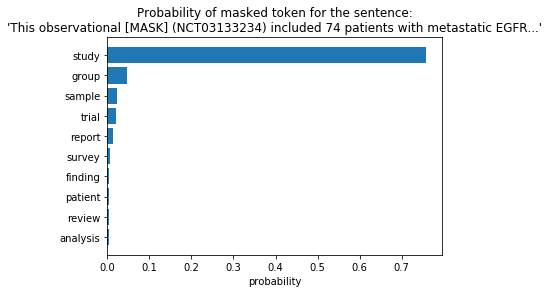

In [8]:
# We can mask one token by setting it's value to [MASK]
# and let BERT try to predict what it should be.

probabilities, top_tokens, token_ids, masked_sentence = \
    get_token_probabilities(tokens, token_ids, segment_ids, 4)
plot_token_probabilities(probabilities, top_tokens, masked_sentence)